In [33]:
import cv2
import os
import sys
import numpy as np
import bcolz
from glob import glob
import operator
from functools import reduce

import matplotlib.pyplot as plt
%matplotlib inline

def save_array(fname, arr): c=bcolz.carray(arr, rootdir=fname, mode='w'); c.flush()
def load_array(fname): return bcolz.open(fname)[:]

In [30]:
i_p = 'datasets/mydataset'
o_p = 'datasets/mydataset_compressed'

sample_size = 20#None

# supported image format
i_ext = ['*.jpg', '*.JPG', '*.png']

for s in glob(os.path.join(i_p, '*')):
    
    # images paths list
    i_pl = reduce(operator.add, [glob(os.path.join(s, i)) for i in i_ext], [])
    if not sample_size: sample_size = len(i_pl)
    print('Total available images: %d' %len(i_pl))

    ims = np.empty((0,) + (512, 512, 4))
#     target_size = (512, 512)
#     ims = np.empty(((0,) + target_size + (4,)))
    
    for i in i_pl[:sample_size]:
        print(i)
        im = cv2.imread(i, cv2.IMREAD_UNCHANGED)
#         im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB) # b,g,r = cv2.split(im); im = cv2.merge([r,g,b]) 
#         im = cv2.resize(im, target_size)
        ims = np.append(ims, im.reshape((1,) + im.shape), axis=0)
        
    out = os.path.join(o_p, s.split('/')[-1])
    if not os.path.exists(out): os.makedirs(out)
    print(out)

    save_array(out, ims)

Total available images: 465
datasets/mydataset/test_label/308315761_3_cb.png
datasets/mydataset/test_label/2993871777_1_cb.png
datasets/mydataset/test_label/3038747613_1_cb.png
datasets/mydataset/test_label/3213274513_1_cb.png
datasets/mydataset/test_label/3030012395_1_cb.png
datasets/mydataset/test_label/3006823882_1_cb.png
datasets/mydataset/test_label/2973812613_1_cb.png
datasets/mydataset/test_label/3049194263_1_cb.png
datasets/mydataset/test_label/3166167569_1_cb.png
datasets/mydataset/test_label/3227203804_1_cb.png
datasets/mydataset/test_label/3238436027_1_cb.png
datasets/mydataset/test_label/3051765471_1_cb.png
datasets/mydataset/test_label/3059991217_1_cb.png
datasets/mydataset/test_label/3202279106_1_cb.png
datasets/mydataset/test_label/3213270807_2_cb.png
datasets/mydataset/test_label/3160584865_1_cb.png
datasets/mydataset/test_label/3218990939_1_cb.png
datasets/mydataset/test_label/3077637317_1_cb.png
datasets/mydataset/test_label/3071120472_1_cb.png
datasets/mydataset/test

datasets/mydataset_compressed/train_img
(512, 512, 4)


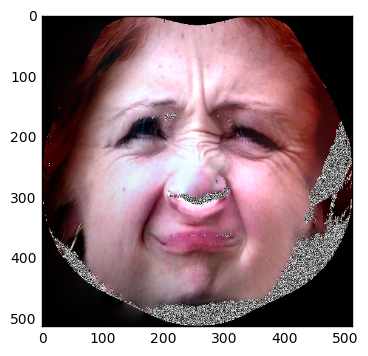

In [38]:
print(out)
test = load_array(out)
print(test[0].shape)
plt.imshow(test[0][:,:,:3].astype(np.uint8)[:,:,[2,1,0]])